7 Show linear regression technique for user values. Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset.
The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/HousingData.csv')

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False   True  False  False  False   

     PTRATIO      B  LSTAT   MEDV  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False   True  False  
..       ...    ...    ...    ...  
501    False  False   True  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]>

In [4]:
boston=data.dropna(axis=1)

<Axes: >

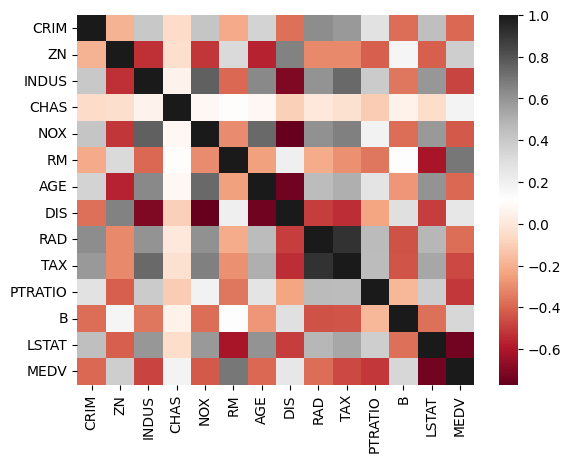

In [5]:
data.corr()
sns.heatmap(data.corr(),cmap='RdGy')

<Axes: >

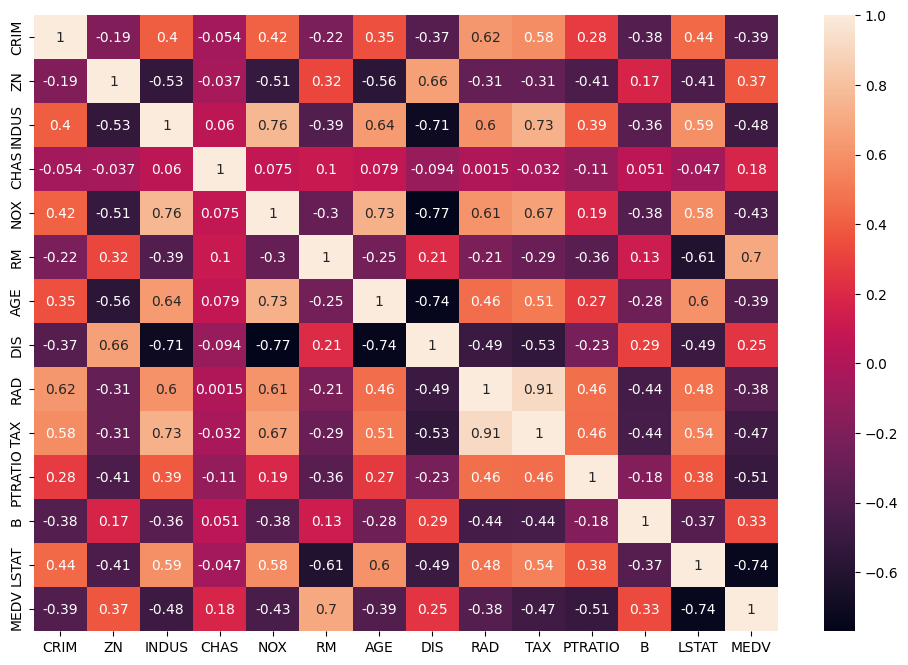

In [6]:
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

In [9]:
x=boston[["RM"]]
y=boston["MEDV"]
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 1)
xtest shape  :  (102, 1)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(xtrain, ytrain)

LinearRegression()

In [12]:
y_pred = model.predict(xtest)
y_pred

array([22.90445223, 21.80741526, 23.2795076 , 13.67809006, 21.95743741,
       18.22563646, 18.89135974, 19.48207195, 10.15256956, 23.5795519 ,
       19.37893173, 25.94240075, 22.9794633 ,  7.1427502 , 36.67836079,
       29.54293232, 22.05120126, 31.84952286, 24.90162209, 18.37565861,
       23.77645597, 18.65695014, 20.97291706, 24.30153349, 16.80042604,
       -0.25521702, 19.4539428 , 17.05358842, 39.1818554 , 20.64474361,
       21.51674735, 20.54160338, 21.90117911, 20.67287276, 23.68269213,
       17.93496854, 19.66022326, 18.61006821, 23.04509799, 21.30109051,
       20.97291706, 17.77557001, 21.13231559, 14.40944804, 24.84536378,
       23.72957405, 17.81307555, 20.99166983,  9.49622266, 26.59874765,
       21.20732667, 16.68790943, 19.60396495, 40.96336842, 17.50365486,
       18.74133759, 17.02545926, 18.82572505, 17.50365486, 19.40706088,
       18.69445567, 20.84164768, 28.98972565, 24.95788039, 17.09109396,
       24.99538593, 25.92364798, 23.31701314, 27.77079569, 18.76

In [14]:
features=np.array([[6]])
prediction=model.predict(features)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.78211625])

In [15]:
print(f"Predicted house Price for rm {features} user input is :",prediction)

Predicted house Price for rm [[6]] user input is : [19.78211625]
